<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/k_means_clustering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
from mpl_toolkits.mplot3d.axes3d import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6, 6

In [13]:
"""
Loading the data
scale -> for normalize the data at any axe
"""
iris_data = datasets.load_iris()
X = scale(iris_data.data)

y = pd.DataFrame(iris_data.target)
variable_names = iris_data.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [14]:
"""
Building and running the model
"""
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [15]:
"""
Plotting the model
"""
iris_df = pd.DataFrame(iris_data.data)
iris_df.columns = ["Sepal_Lenght", "Sepal_Width", "Petal_Lenght", "Petal_Width"]
y.columns = ["Targets"]

Text(0.5, 1.0, 'Ground Truth Classification')

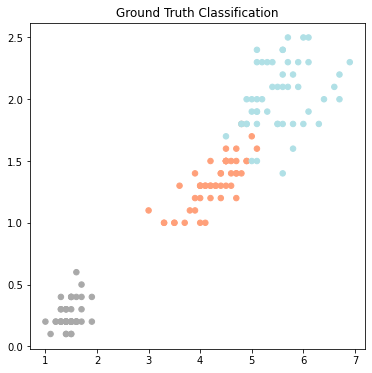

In [29]:
color_theme = np.array(["darkgray", "lightsalmon", "powderblue"])

#plt.subplot(1, 2, 1)
plt.scatter(x=iris_df.Petal_Lenght, y = iris_df.Petal_Width, c = color_theme[iris_data.target], s=30)
plt.title("Ground Truth Classification")

Text(0.5, 1.0, 'K-Means classification')

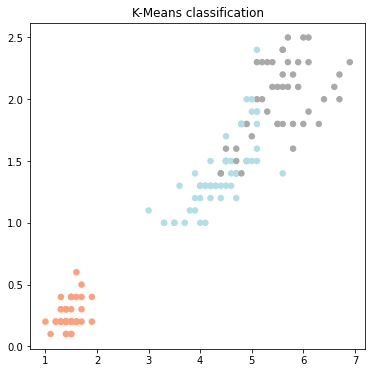

In [30]:
#plt.subplot(1, 2, 2)
plt.scatter(x=iris_df.Petal_Lenght, y = iris_df.Petal_Width, c = color_theme[clustering.labels_], s=30)
plt.title("K-Means classification")

In [32]:
"""
Evalueate clustering result
"""
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

